In [2]:
import pandas as pd
import numpy as np
from sklearn import decomposition
from sklearn import preprocessing
from functions import *

In [3]:
# choix du nombre de composantes à calculer
n_comp = 6

In [9]:
# import de l'échantillon
data = pd.read_csv("my_courses.csv",decimal=".",index_col=0)
data.head()

,inscription,progression,moyenneDeClasse,duree,difficulte,nbChapitres,ratioQuizEvaluation,nbEvaluations,derniereMiseAJour,idCours
titreCours,,,,,,,,,,
Réalisez_une_analyse_exploratoire_de_données,0,19,0,15,2,19,1.0,2,200,4525281
Décrivez_et_nettoyez_votre_jeu_de_données,0,93,0,15,2,25,1.0,3,138,4525266
Créez_vos_diaporamas_en_LaTeX_avec_Beamer_!,58,100,0,4,1,9,NaN,0,1104,207793
Apprenez_le_fonctionnement_des_réseaux_TCP/IP,111,100,0,15,2,18,1.0,4,31,857447
Rédigez_des_documents_de_qualité_avec_LaTeX,112,100,0,10,1,20,NaN,0,468,1617396


In [5]:
# selection des colonnes à prendre en compte dans l'ACP
data_pca = data[["inscription","progression","moyenneDeClasse","duree","difficulte","nbChapitres","ratioQuizEvaluation","nbEvaluations"]]

In [10]:
# préparation des données pour l'ACP
data_pca = data_pca.fillna(data_pca.mean()) # Il est fréquent de remplacer les valeurs inconnues par la moyenne de la variable
X = data_pca.values
names = data["idCours"] # ou data.index pour avoir les intitulés
features = data.columns

In [11]:
# Centrage et Réduction
std_scale = preprocessing.StandardScaler().fit(X)
X_scaled = std_scale.transform(X)

In [12]:
# Calcul des composantes principales
pca = decomposition.PCA(n_components=n_comp)
pca.fit(X_scaled)

PCA(copy=True, iterated_power='auto', n_components=6, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

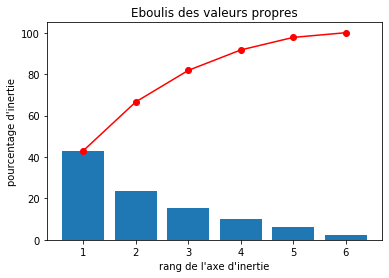

In [13]:
# Eboulis des valeurs propres
display_scree_plot(pca)

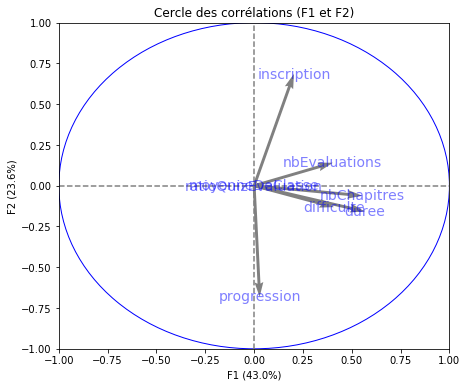

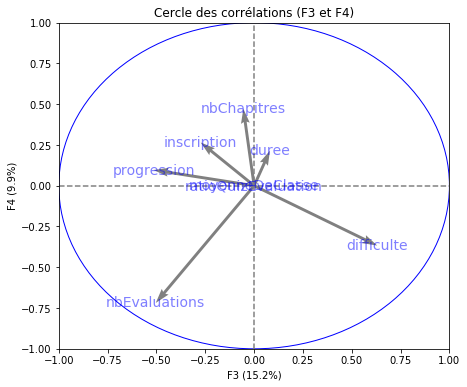

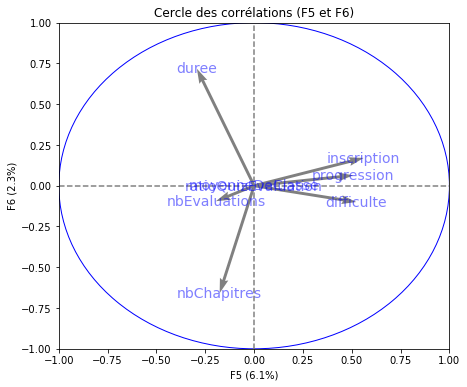

In [14]:
# Cercle des corrélations
pcs = pca.components_
display_circles(pcs, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(features))

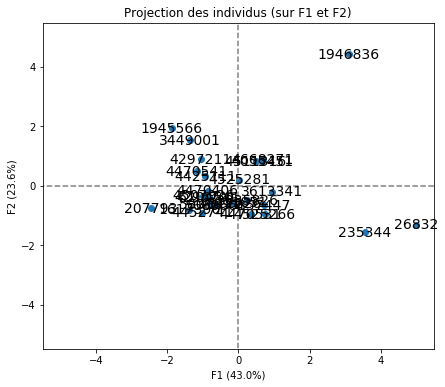

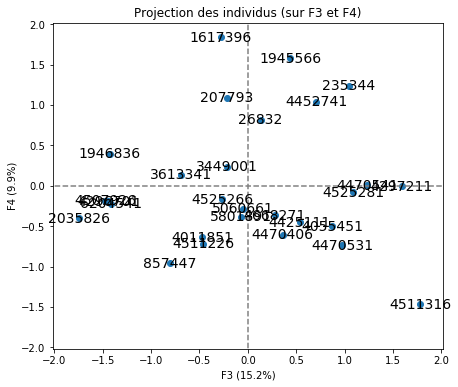

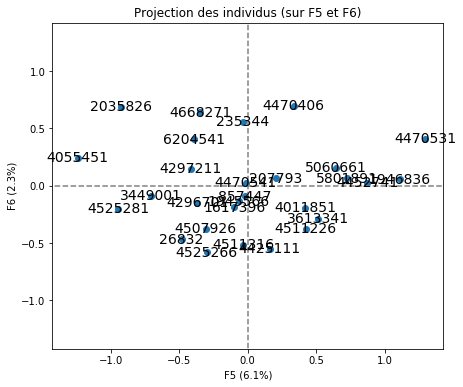

In [15]:
# Projection des individus
X_projected = pca.transform(X_scaled)
display_factorial_planes(X_projected, n_comp, pca, [(0,1),(2,3),(4,5)], labels = np.array(names))

plt.show()